<a href="https://colab.research.google.com/github/raaz0000002/glacier_thesis/blob/main/4th_Year_Thesis_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 50.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

In [4]:
from rasterio.plot import reshape_as_image

In [5]:
with rio.open('/content/drive/MyDrive/Thesis/tif2.tif') as src:
    print(src.profile)
    img = reshape_as_image(src.read())


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 6242, 'height': 5088, 'count': 5, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(8.98315284119514e-05, 0.0, 86.4452391169352,
       0.0, -8.983152841195189e-05, 28.10136821241211), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'interleave': 'pixel'}


In [6]:
img

array([[[-3.402823e+38, -3.402823e+38, -3.402823e+38, -3.402823e+38,
         -3.402823e+38],
        [-3.402823e+38, -3.402823e+38, -3.402823e+38, -3.402823e+38,
         -3.402823e+38],
        [-3.402823e+38, -3.402823e+38, -3.402823e+38, -3.402823e+38,
         -3.402823e+38],
        ...,
        [-3.402823e+38, -3.402823e+38, -3.402823e+38, -3.402823e+38,
         -3.402823e+38],
        [-3.402823e+38, -3.402823e+38, -3.402823e+38, -3.402823e+38,
         -3.402823e+38],
        [-3.402823e+38, -3.402823e+38, -3.402823e+38, -3.402823e+38,
         -3.402823e+38]],

       [[-3.402823e+38, -3.402823e+38, -3.402823e+38, -3.402823e+38,
         -3.402823e+38],
        [-3.402823e+38, -3.402823e+38, -3.402823e+38, -3.402823e+38,
         -3.402823e+38],
        [-3.402823e+38, -3.402823e+38, -3.402823e+38, -3.402823e+38,
         -3.402823e+38],
        ...,
        [-3.402823e+38, -3.402823e+38, -3.402823e+38, -3.402823e+38,
         -3.402823e+38],
        [-3.402823e+38, -3.40282

In [7]:
red = img[:, :, 2]
green = img[:, :, 1]
blue = img[:, :, 0]

<ipython-input-8-d200529a6c26>:4: RuntimeWarning: overflow encountered in multiply
  plt.imshow(rbg*4)


(np.float64(-0.5), np.float64(6241.5), np.float64(5087.5), np.float64(-0.5))

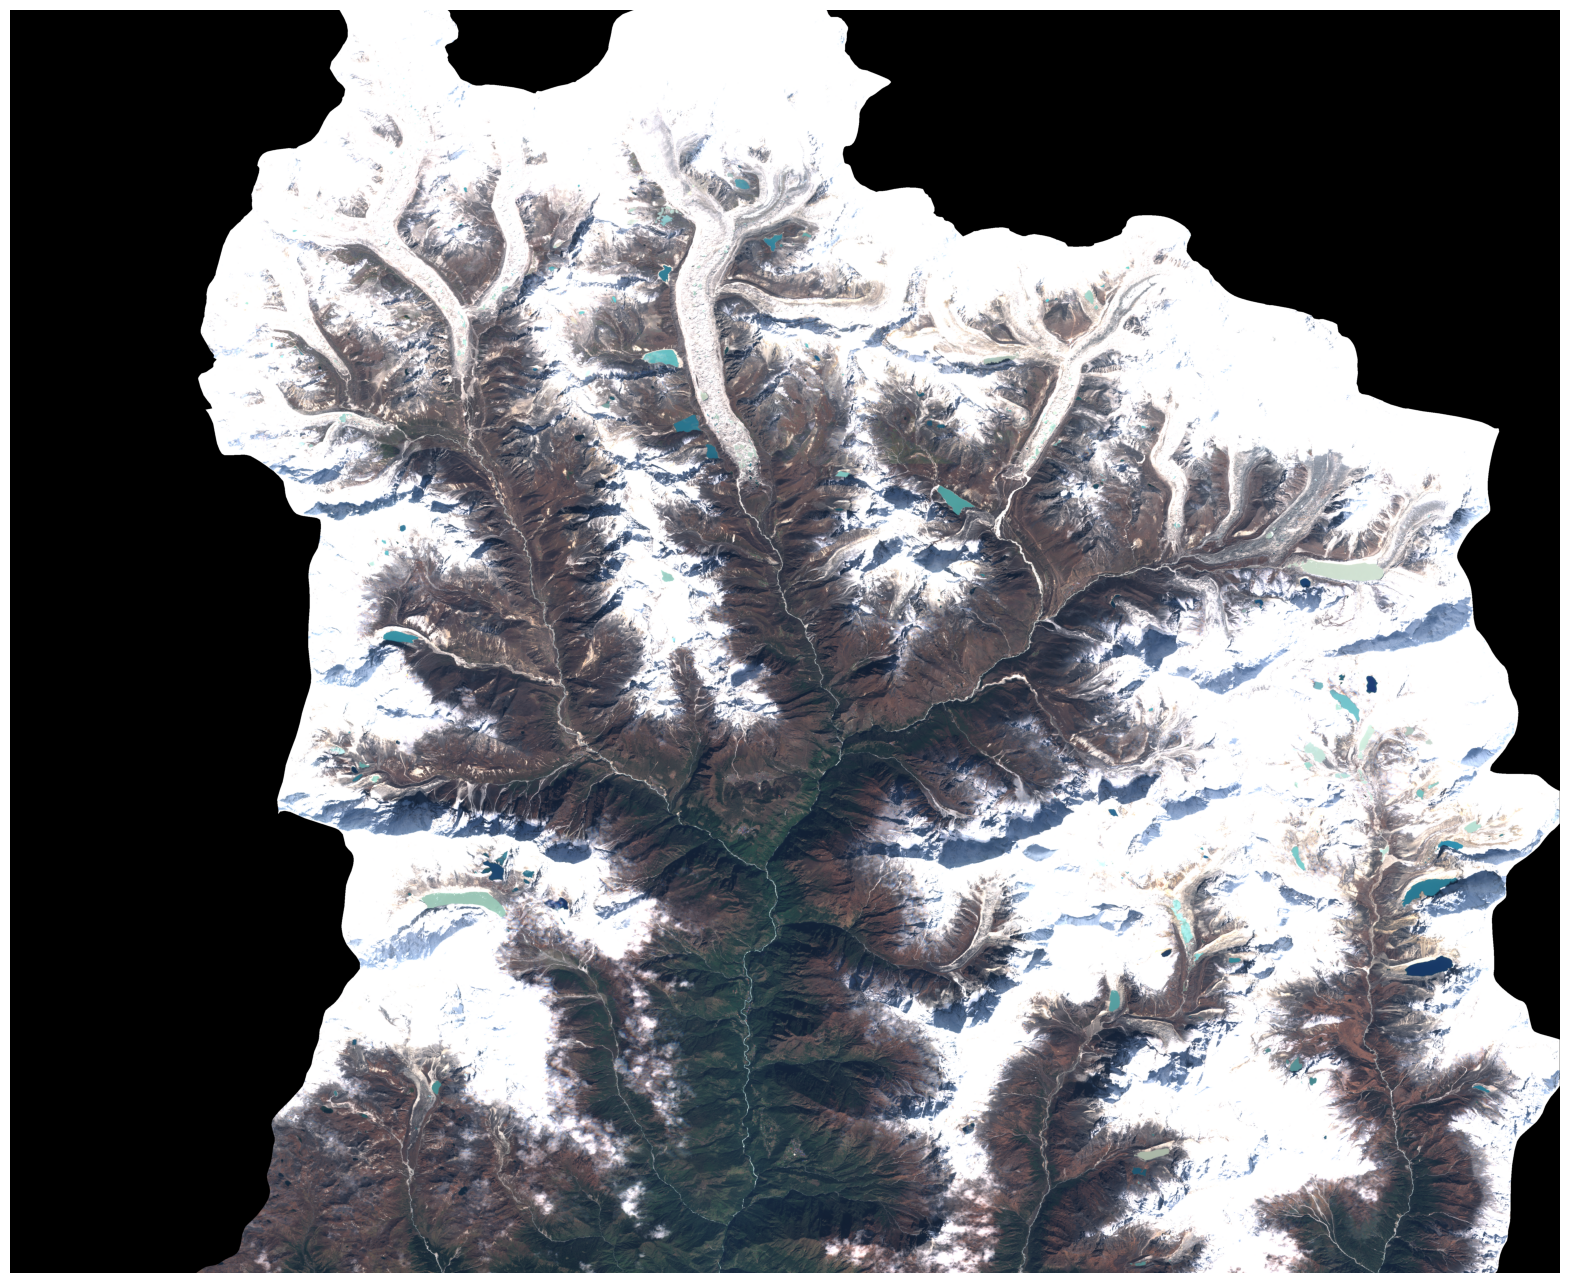

In [8]:
rbg= np.dstack((red,green,blue))

plt.figure(figsize=(20,20))
plt.imshow(rbg*4)

plt.axis('off')

In [9]:
import rasterio

with rasterio.open('/content/drive/MyDrive/Thesis/tif2.tif') as src:
    print(src.count)  # Number of bands

print(img.shape)  # Should give (height, width, bands)


5
(5088, 6242, 5)


In [10]:
import rasterio

with rasterio.open('/content/drive/MyDrive/Thesis/tif2.tif') as src:
    print(f'Band count: {src.count}')
    print(f'Description for each band:')
    for i in range(1, src.count + 1):  # rasterio bands are 1-indexed
        print(f'Band {i}: {src.descriptions[i-1]}')


Band count: 5
Description for each band:
Band 1: B2
Band 2: B3
Band 3: B4
Band 4: B8
Band 5: QA60


In [11]:
nir = img[:,:,3]

In [12]:
NDVI = (nir-red )/(nir+red)

<ipython-input-12-d95b9652b882>:1: RuntimeWarning: overflow encountered in add
  NDVI = (nir-red )/(nir+red)


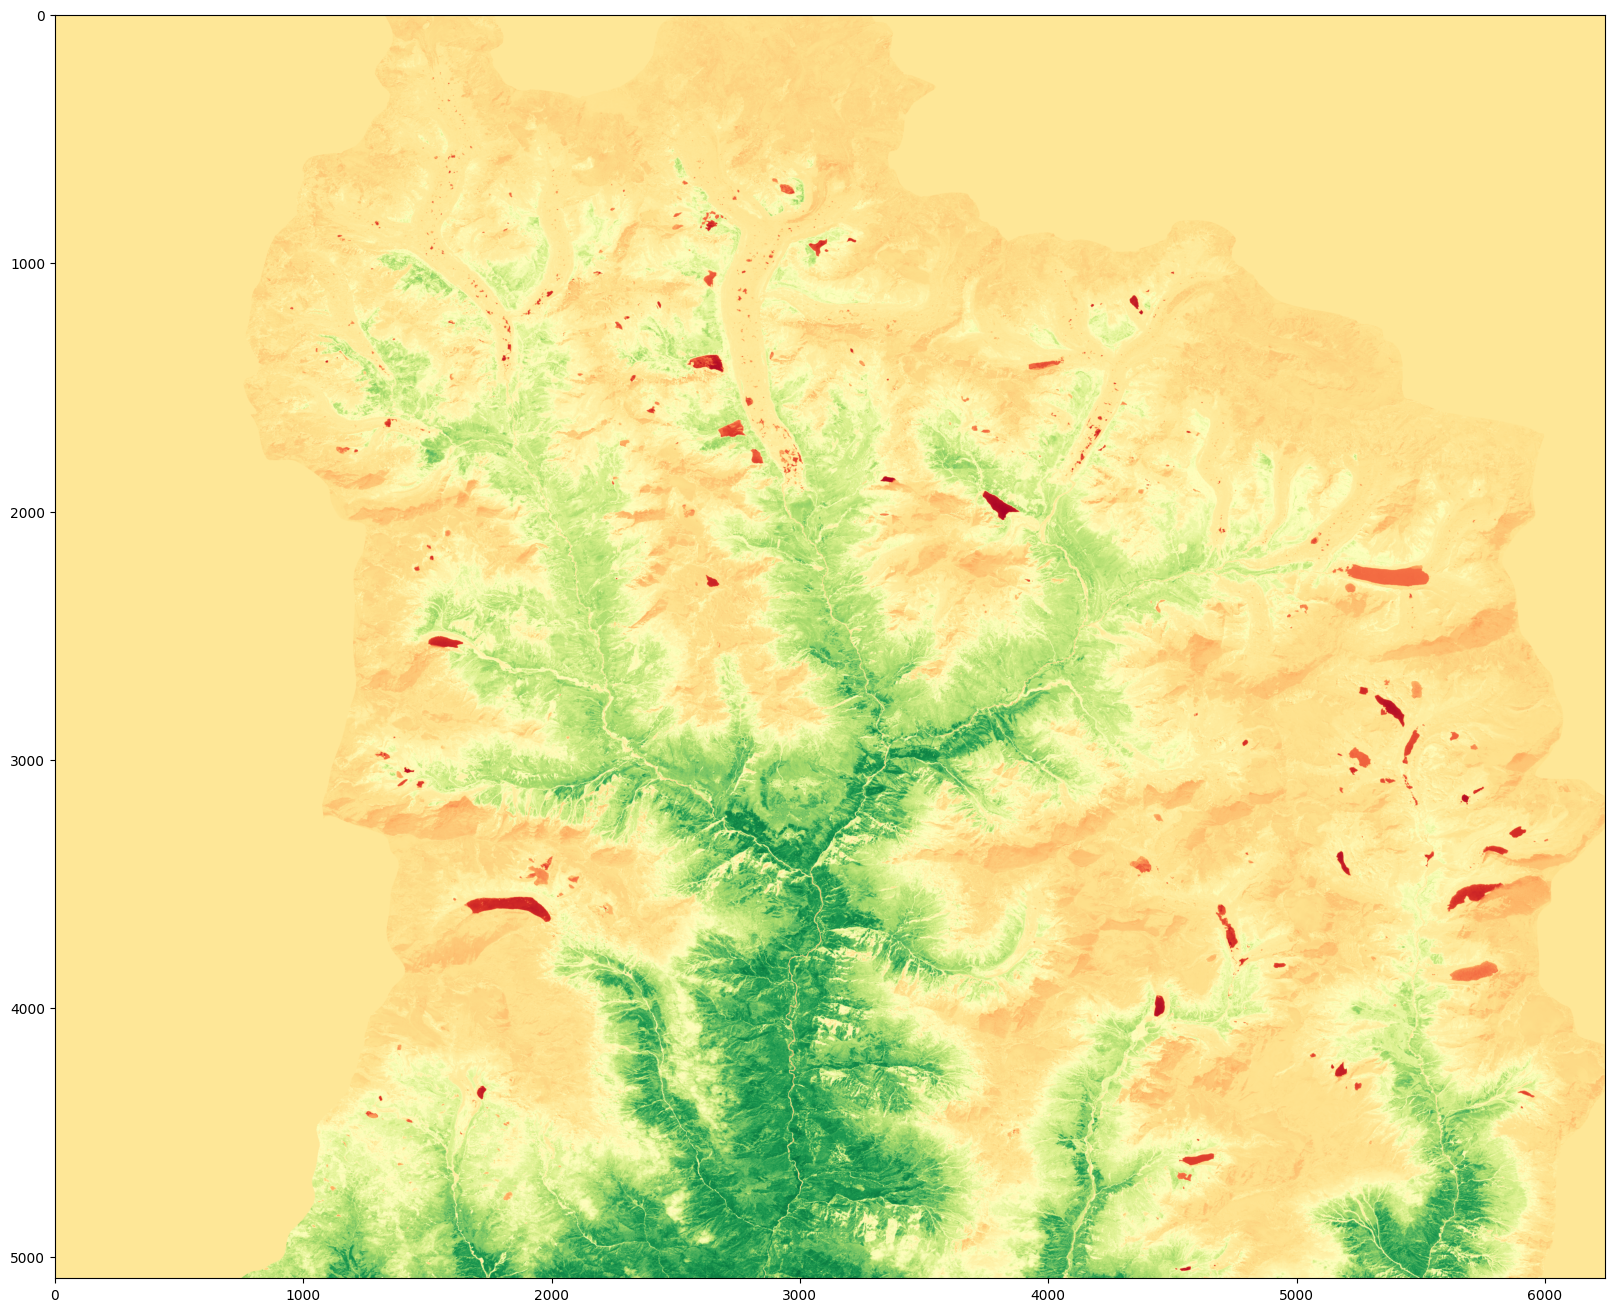

In [13]:
plt.figure(figsize=(20,20))
plt.imshow(NDVI, cmap = "RdYlGn")


In [14]:
!pip install earthpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.4 MB/s eta 0:00:00


In [15]:
import earthpy.plot as ep

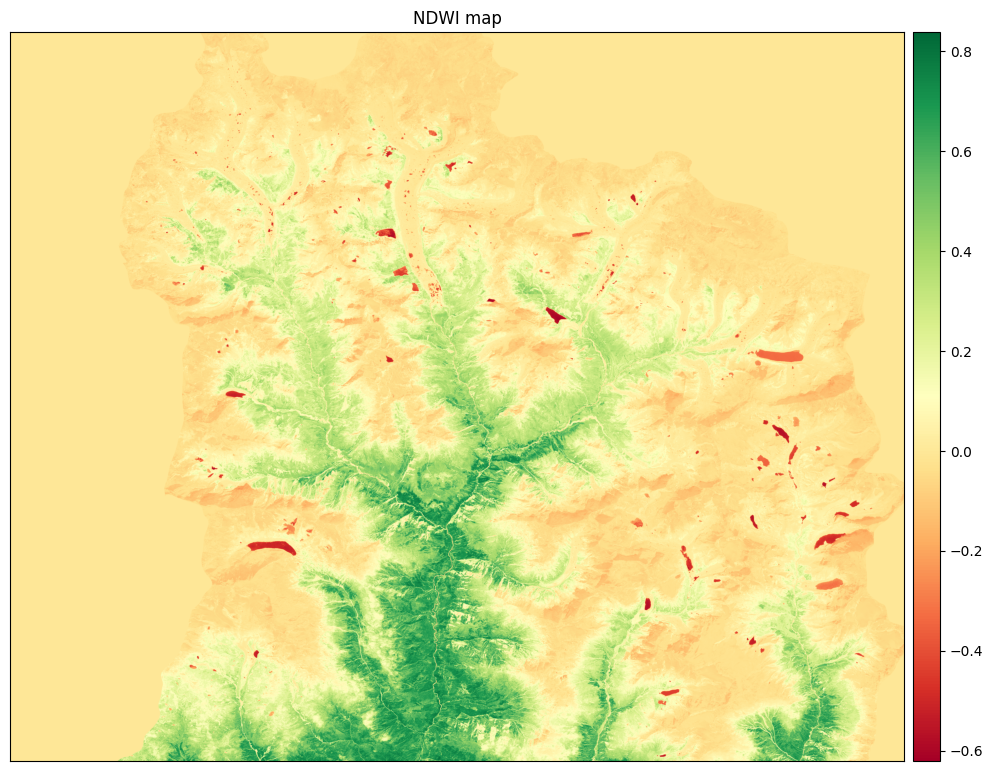

<Axes: title={'center': 'NDWI map'}>

In [16]:
ep.plot_bands(NDVI, cmap = "RdYlGn", title = "NDWI map")


In [17]:
water = NDVI < -0.2

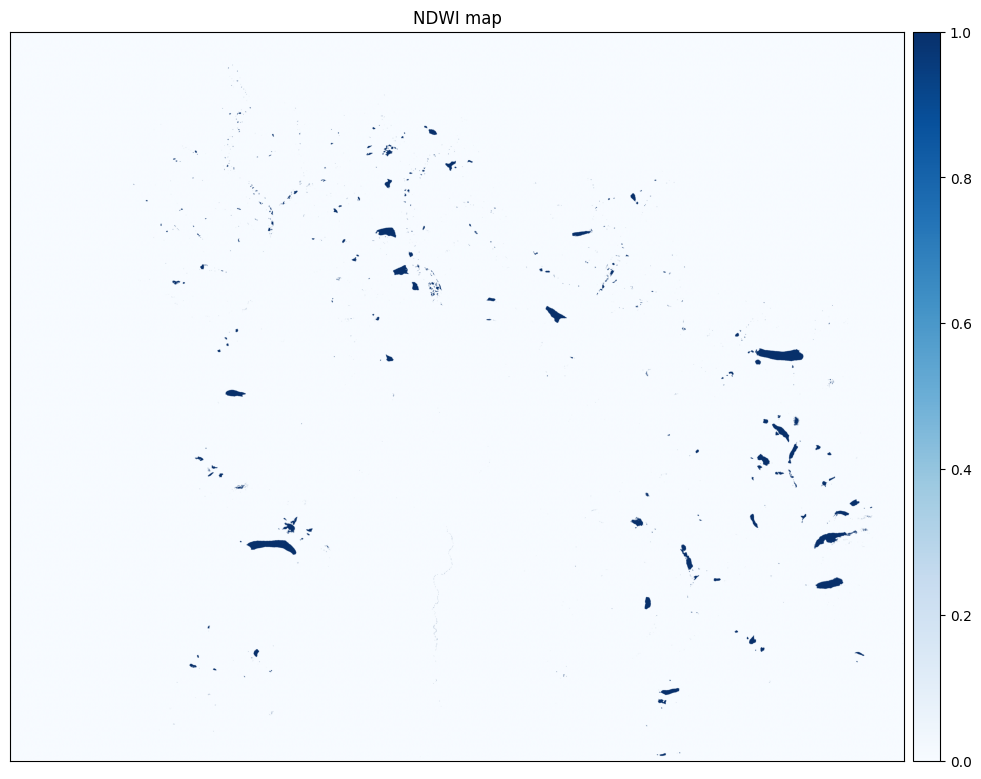

<Axes: title={'center': 'NDWI map'}>

In [21]:
ep.plot_bands(water, cmap = "Blues", title = "NDWI map")

In [19]:
pip install fiona

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 62.6 MB/s eta 0:00:00


In [42]:
# prompt: write a code to export the eater bodies : water = NDVI < -0.2 as extracted below as shapefile and kml file

import pandas as pd
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
from rasterio.plot import reshape_as_image
import rasterio
import earthpy.plot as ep
import fiona
from rasterio.features import shapes
from shapely.geometry import shape, mapping
import geopandas as gpd

# Assuming the previous code has executed and 'water' array is available

# --- Rasterio setup ---
with rio.open('/content/drive/MyDrive/Thesis/tif2.tif') as src:
    profile = src.profile
    transform = src.transform

# --- Shapefile creation ---
# Convert the boolean array to uint8 to match the expected dtype
water_uint8 = water.astype(np.uint8)

results = ({'properties': {'raster_val': v}, 'geometry': s}
           for i, (s, v)
           in enumerate(shapes(water_uint8, mask=water_uint8, transform=transform)))

# Write to a shapefile
schema = {'geometry': 'Polygon', 'properties': {'raster_val': 'int'}}
with fiona.open('water_bodies.shp', 'w', driver='ESRI Shapefile',
                crs=profile['crs'], schema=schema) as c:
    c.writerecords(results)

# --- KML creation ---
# Convert shapefile to GeoDataFrame
gdf = gpd.read_file('water_bodies.shp')

# Export to KML
gdf.to_file('water_bodies.kml', driver='KML')

✅ Exported cleaned shapefile as 'glaciers.shp'


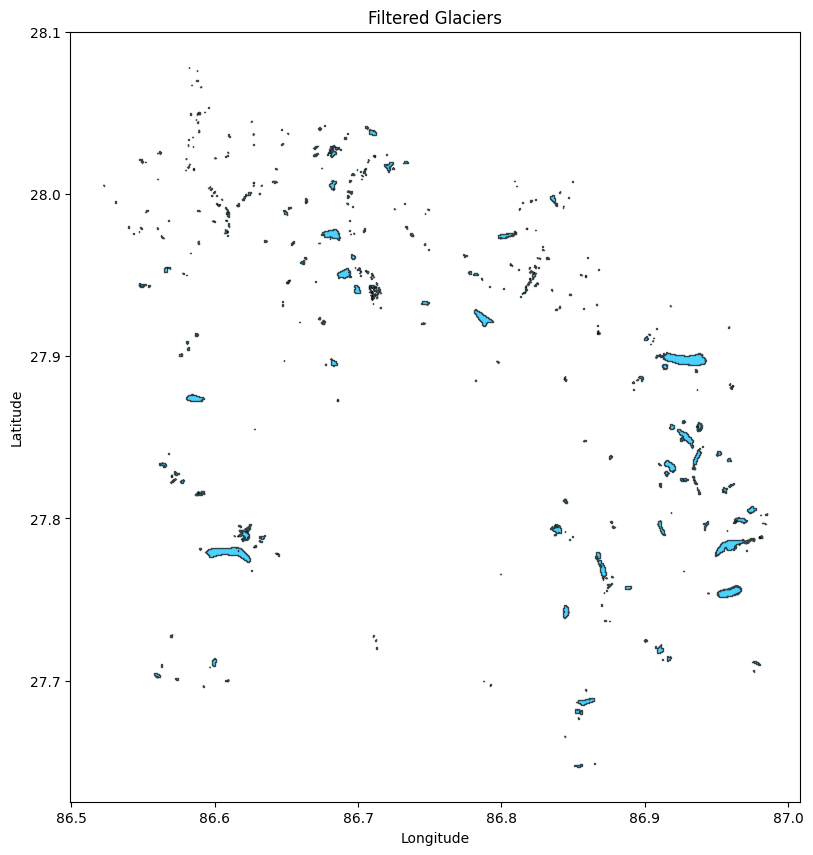

In [43]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

try:
    # Load the shapefile
    water_bodies = gpd.read_file('water_bodies.shp')

    # Optional: Reproject to UTM for accurate area filtering
    water_proj = water_bodies.to_crs(epsg=32645)  # UTM Zone 45N (adjust if needed)

    # Add area column and filter out small features (e.g., < 10 m²)
    water_proj["area"] = water_proj.geometry.area
    filtered = water_proj[water_proj["area"] > 1000]

    # Reproject back to original CRS
    filtered = filtered.to_crs(water_bodies.crs)

    # Export as new shapefile
    filtered.to_file("glaciers.shp")

    print("✅ Exported cleaned shapefile as 'glaciers.shp'")

    # Plot the result
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    filtered.plot(ax=ax, color='deepskyblue', edgecolor='black', alpha=0.7)

    ax.set_title('Filtered Glaciers')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()

except FileNotFoundError:
    print("❌ Error: 'water_bodies.shp' not found. Upload or generate it first.")
except Exception as e:
    print(f"❌ An error occurred: {e}")


# New Section